In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from wordcloud import WordCloud 
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Resume.csv')
data

,Resumes,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,Workday Resume
75,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday Resume


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [5]:
data.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().count()

Resumes     79
Category    79
dtype: int64

In [8]:
def preprocess(txt):
    txt = txt.lower()                                                             
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           
    txt = re.sub('http\S+\s*', ' ', txt)                                         
    txt = re.sub('RT|cc', ' ', txt)                                               
    txt = re.sub('#\S+', '', txt)                                                
    txt = re.sub('@\S+', '  ', txt)                                              
    txt = re.sub('\s+', ' ', txt)                                                
    txt = nltk.tokenize.word_tokenize(txt)                                        
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     
    return ' '.join(txt)                                                       

In [9]:
data['Resumes'] = data['Resumes'].apply(lambda w: preprocess(w))

# Exploratory Data Analysis

In [10]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 361), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('technical', 164), ('creating', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 125), ('custom', 124), ('js', 123

In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to C:\Users\Bharat
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Bharat
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


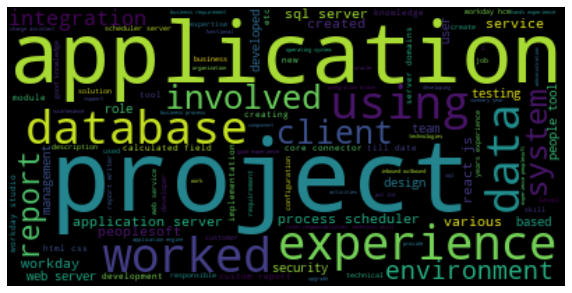

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [14]:
df_categories = [data[data['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 24  anubhav kumar singh core competencies scriptin...  PeopleSoft Resume
 25  g ananda rayudu www linkedin com anandgudapati...  PeopleSoft Resume
 26  peoplesoft database administrator gangareddy p...  PeopleSoft Resume
 27  classification internal classification interna...  PeopleSoft Resume
 28  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 29  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 30  peoplesoft administrator srinivas k experience...  PeopleSoft Resume
 31  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resume
 32  vinod akkala peoplesoft dba admin professional...  PeopleSoft Resume
 33  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 34  peoplesoft administration vivekanand sayana ca...  PeopleSoft Resume
 35  arun venu experience summary experience years ...  PeopleSoft Resume
 36  personal details name pritam bisw

In [15]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [16]:
import matplotlib.pyplot as plt

In [17]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

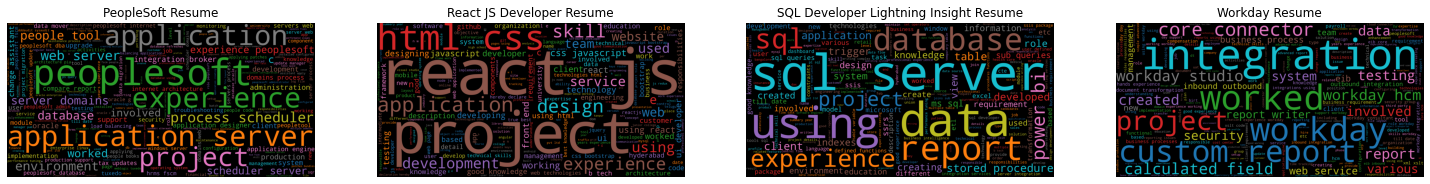

In [18]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

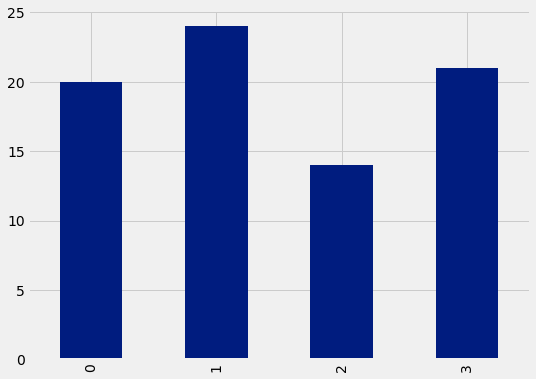

In [73]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(8,6))
plt.show()

In [20]:
def wordfreq(data):
    count = data['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(5)

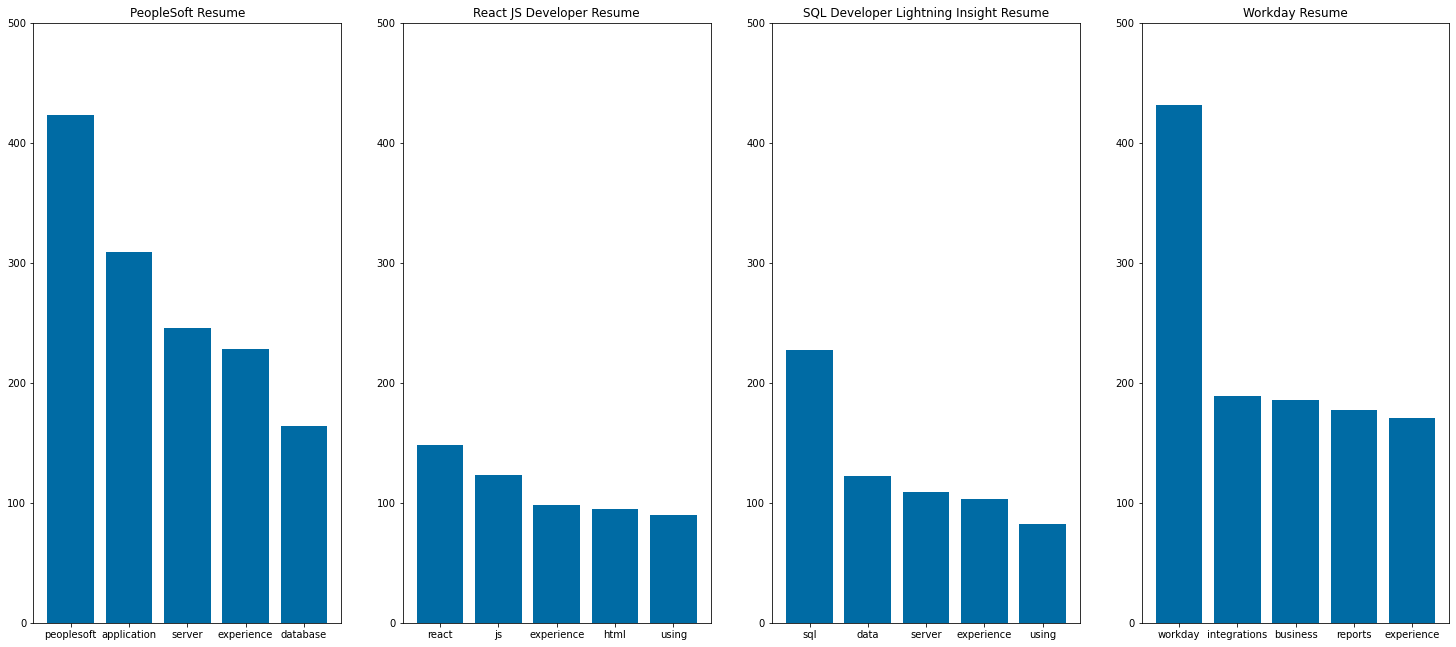

In [21]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [22]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data

,Resumes,Category
0,name ravali p curriculum vitae specialization ...,1
1,susovan bag seeking challenging position field...,1
2,kanumuru deepak reddy career objective secure ...,1
3,haripriya battina experience ui developer reac...,1
4,kamalakar reddy linked www linkedin com kamala...,1
...,...,...
74,workday integration consultant name sri krishn...,3
75,srikanth workday hcm consultant seeking suitab...,3
76,workday hcm fcm name kumar role workday consul...,3
77,venkateswarlu b workday consultant professiona...,3


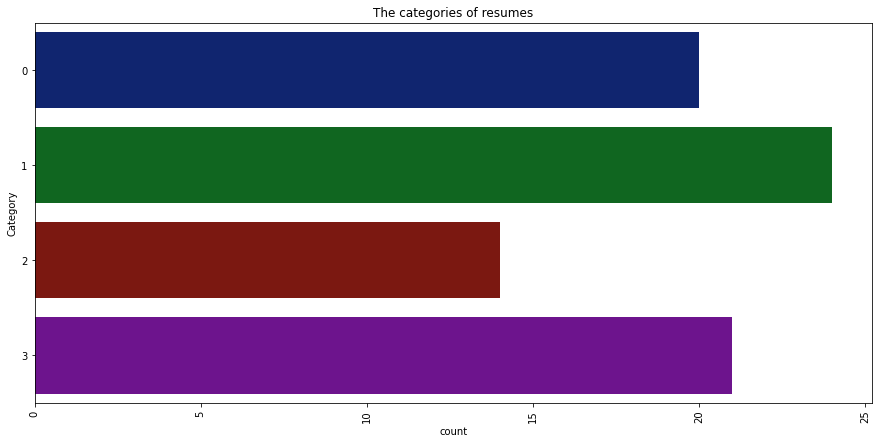

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,7))
plt.title("The categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data,color=None)
plt.show()

In [24]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [25]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

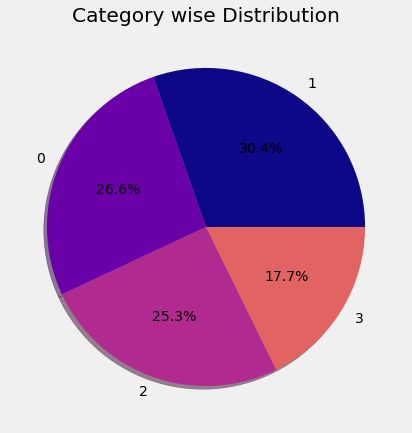

In [69]:
from matplotlib.gridspec import GridSpec
targetCounts = data.Category.value_counts()
targetLabels  = data.Category.unique()

plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='Category wise Distribution')
plt.style.use('seaborn-dark-palette')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [27]:
from collections import Counter

In [28]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

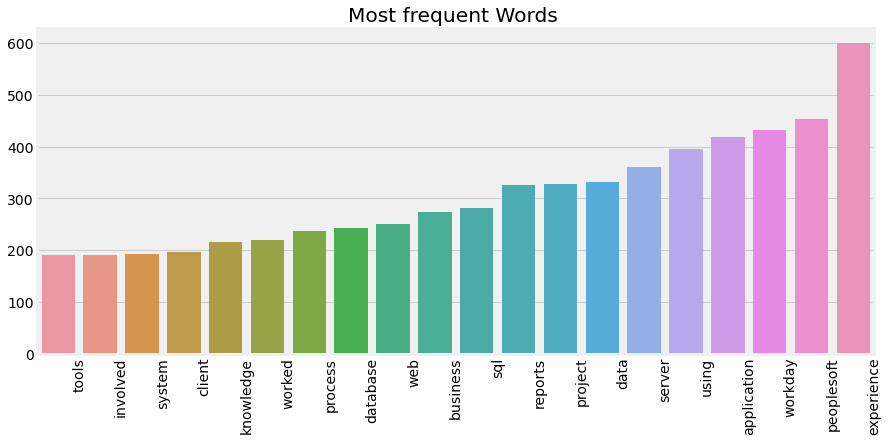

In [29]:
plt.figure(figsize=(15,6))
wordBarGraphFunction_1(data,"Resumes","Most frequent Words ")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrixfrom scipy.sparse import hstack
import pandas as pd
from sklearn.model_selection import train_test_split

# Vectorization

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [31]:
requiredText = data['Resumes'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [32]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(71, 4460)
(8, 4460)


In [33]:
vectorizer=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',stop_words = 'english')
bag = vectorizer.fit_transform(requiredText)

In [34]:
vectorizer.vocabulary_

{'ravali': 3227,
 'p': 2781,
 'curriculum': 935,
 'vitae': 4319,
 'specialization': 3730,
 'computer': 744,
 'science': 3519,
 'engg': 1297,
 'c': 498,
 'r': 3196,
 'ee': 1233,
 'ob': 2650,
 'je': 2076,
 'ct': 921,
 'v': 4240,
 'e': 1209,
 'utilize': 4230,
 'technical': 3981,
 'skills': 3675,
 'achieving': 16,
 'target': 3957,
 'developing': 1093,
 'best': 388,
 'performance': 2877,
 'organization': 2737,
 'u': 4160,
 'ion': 2041,
 'degree': 1020,
 'course': 881,
 'college': 685,
 'institute': 1978,
 'university': 4186,
 'board': 425,
 'percentage': 2874,
 'cgpa': 588,
 'year': 4459,
 'passing': 2828,
 'cgpacgpa': 589,
 'j': 2063,
 'b': 325,
 'technology': 3990,
 'vtu': 4346,
 'diploma': 1121,
 'aryabharathi': 241,
 'polytechnic': 2963,
 'karnataka': 2126,
 'state': 3804,
 'examination': 1378,
 'bengaluru': 387,
 'sslc': 3777,
 'empress': 1282,
 'girls': 1635,
 'high': 1771,
 'school': 3516,
 'secondary': 3545,
 'education': 1230,
 'manual': 2349,
 'testing': 4020,
 'strong': 3843,
 'k

In [35]:
print(vectorizer.get_feature_names())

['abdul', 'abilities', 'ability', 'able', 'abreast', 'abs', 'absence', 'absent', 'abstract', 'abstraction', 'academic', 'academics', 'achieve', 'achieved', 'achievement', 'achievements', 'achieving', 'acknowledged', 'acknowledgement', 'acquainted', 'acquire', 'acquisition', 'acs', 'action', 'actionable', 'actions', 'activated', 'activating', 'active', 'actively', 'activities', 'activity', 'acts', 'ad', 'adapt', 'adaptability', 'adaptive', 'add', 'added', 'adding', 'additional', 'additionally', 'additive', 'addm', 'address', 'addressing', 'adept', 'adhere', 'adhering', 'adhoc', 'aditya', 'admin', 'adminissions', 'administer', 'administering', 'administrating', 'administration', 'administrative', 'administrator', 'admission', 'ado', 'adobe', 'adopt', 'adopting', 'adp', 'adult', 'advance', 'advanced', 'advancement', 'advantage', 'advice', 'ae', 'aeroplanes', 'aetna', 'affecting', 'affigent', 'affiliated', 'affirm', 'aforementioned', 'ag', 'age', 'agent', 'aggregate', 'aggregator', 'agile'

In [36]:
X=bag.toarray()
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X,requiredTarget, stratify=requiredTarget,random_state=42, test_size=0.3)

In [37]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(data["Resumes"])
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

,term,occurrences,frequency
0,abdul,3,0.000074
1,abilities,5,0.000124
2,ability,41,0.001016
3,able,2,0.000050
4,abreast,1,0.000025
...,...,...,...
4545,zenefits,3,0.000074
4546,zero,1,0.000025
4547,zerozilla,2,0.000050
4548,zones,1,0.000025


<AxesSubplot:ylabel='Density'>

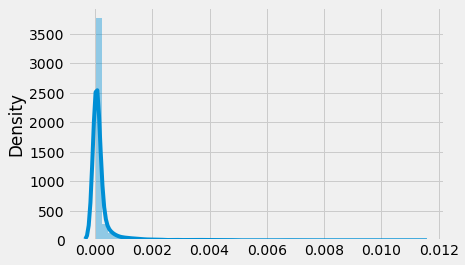

In [38]:
sns.distplot(x =[word_freq_df['frequency']])

In [39]:
vectorizer2 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer2.fit_transform(data["Resumes"])
names_features = vectorizer2.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df12 = pd.DataFrame(denselist, columns = names_features)
df12

,ability,absence,academic,achieve,achievements,active,activities,activity,add,adding,...,write,writer,writing,written,www,xml,xp,xslt,xtt,year
0,0.000000,0.000000,0.055826,0.0,0.057736,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084751
1,0.000000,0.000000,0.119884,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.055049,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.05179,0.000000,0.000000,0.106691,0.000000,0.000000,0.000000,0.000000,0.000000,0.041786
3,0.000000,0.000000,0.089584,0.0,0.092649,0.0,0.050747,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068000
4,0.054178,0.000000,0.000000,0.0,0.000000,0.0,0.090606,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.093239,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.018386,0.051066,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.123606,0.038848,0.000000,0.000000,0.076258,0.000000,0.107415,0.000000,0.000000
75,0.019774,0.192225,0.000000,0.0,0.030188,0.0,0.016535,0.000000,0.029189,0.025346,...,0.00000,0.044313,0.020891,0.000000,0.000000,0.082015,0.000000,0.069315,0.034031,0.000000
76,0.000000,0.023361,0.000000,0.0,0.000000,0.0,0.000000,0.027708,0.024832,0.043124,...,0.00000,0.056547,0.000000,0.000000,0.000000,0.104658,0.000000,0.098280,0.028951,0.000000
77,0.000000,0.058606,0.000000,0.0,0.000000,0.0,0.035288,0.000000,0.000000,0.000000,...,0.00000,0.070928,0.022292,0.000000,0.000000,0.087517,0.030183,0.098620,0.000000,0.000000


# Model Building

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [41]:
x_train,x_test,y_train,y_test = train_test_split(WordFeatures, requiredTarget, random_state=0,
                                                 test_size=0.2)
print("X Train shape:",x_train.shape)
print("Y Train shape:",y_train.shape)
print("x Test shape:",x_test.shape)
print("y Test shape:",y_test.shape)

X Train shape: (63, 4460)
Y Train shape: (63,)
x Test shape: (16, 4460)
y Test shape: (16,)


# DECISION TREE

In [42]:
DT = DecisionTreeClassifier()
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
DT_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_dt = DT_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_dt = np.mean(pred_train_dt==y_train)
print("ACCURACY OF TRAIN DATA IN DECISION TREE:",train_acc_dt )

#Predicting on Test Data
pred_test_dt = DT_classifier.predict(x_test)
#Accuracy on Test Data
test_acc_dt = np.mean(pred_test_dt==y_test)
print("ACCURACY OF TEST DATA IN DECISION TREE:",test_acc_dt )

#Confusion Matrix
dt_cm = confusion_matrix(y_test,pred_test_dt)

#Classification Report
print("CLASSIFICATION REPORT OF DECISION TREE:\n", classification_report(y_test,pred_test_dt))

ACCURACY OF TRAIN DATA IN DECISION TREE: 0.8571428571428571
ACCURACY OF TEST DATA IN DECISION TREE: 0.6875
CLASSIFICATION REPORT OF DECISION TREE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.17      1.00      0.29         1
           2       0.00      0.00      0.00         5
           3       1.00      1.00      1.00         6

    accuracy                           0.69        16
   macro avg       0.54      0.75      0.57        16
weighted avg       0.64      0.69      0.64        16



In [43]:
accuracy_dt = round(accuracy_score(y_test,pred_test_dt),4)
precision_dt = round(precision_score(y_test,pred_test_dt,average = 'macro'),4)
recall_dt = round(recall_score(y_test,pred_test_dt,average = 'macro'),4)
f1_dt = round(f1_score(y_test,pred_test_dt,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_dt )
print('Precision Score  : ',precision_dt )
print('Recall Score     : ', recall_dt)
print('f1-Score         : ',f1_dt )

Accuracy Score   :  0.6875
Precision Score  :  0.5417
Recall Score     :  0.75
f1-Score         :  0.5714


<AxesSubplot:title={'center':'DECISION TREE'}>

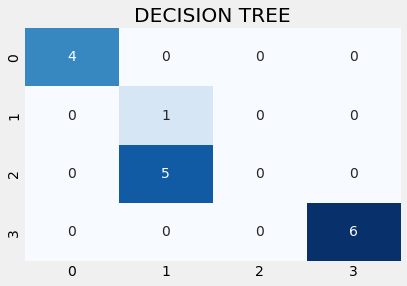

In [44]:
plt.subplot
plt.title("DECISION TREE")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="Blues", fmt="d")

# RANDOM FOREST

In [45]:
RF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF_classifier = RandomForestClassifier(**RF)
RF_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_rf = RF_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_rf = np.mean(pred_train_rf==y_train)
print("ACCURACY OF TRAIN DATA IN RANDOM FOREST:",train_acc_rf)

#Predicting on Test Data
pred_test_rf = RF_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_rf = np.mean(pred_test_rf==y_test)
print("ACCURACY OF TEST DATA IN RANDOM FOREST:",test_acc_rf )

#Confusion Matrix
rf_cm = confusion_matrix(y_test,pred_test_rf)

#Classification Report
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n", classification_report(y_test,pred_test_rf))

ACCURACY OF TRAIN DATA IN RANDOM FOREST: 1.0
ACCURACY OF TEST DATA IN RANDOM FOREST: 0.9375
CLASSIFICATION REPORT OF RANDOM FOREST:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6

    accuracy                           0.94        16
   macro avg       0.88      0.95      0.89        16
weighted avg       0.97      0.94      0.94        16



In [46]:
accuracy_rf = round(accuracy_score(y_test,pred_test_rf),4)
precision_rf = round(precision_score(y_test,pred_test_rf,average = 'macro'),4)
recall_rf = round(recall_score(y_test,pred_test_rf,average = 'macro'),4)
f1_rf = round(f1_score(y_test,pred_test_rf,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_rf )
print('Precision Score  : ',precision_rf )
print('Recall Score     : ', recall_rf)
print('f1-Score         : ',f1_rf )

Accuracy Score   :  0.9375
Precision Score  :  0.875
Recall Score     :  0.95
f1-Score         :  0.8889


<AxesSubplot:title={'center':'RANDOM FOREST CLASSIFICATION'}>

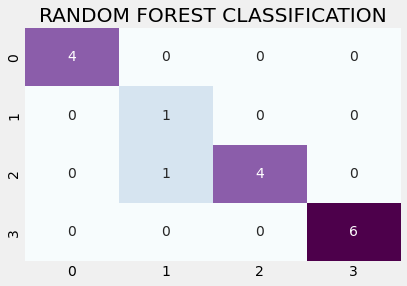

In [47]:
plt.subplot
plt.title("RANDOM FOREST CLASSIFICATION")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="BuPu", fmt="d")

#  NAVIE BAYES

In [48]:
from sklearn.naive_bayes import MultinomialNB as MB

In [49]:
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)

#Predicting On Train Data
pred_train_mb = classifier_mb.predict(x_train)
#Accuracy On Train Data
train_acc_mb = np.mean(pred_train_mb==y_train)
print("ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES:", train_acc_mb)

#Predicting On Test Data
pred_test_mb = classifier_mb.predict(x_test)
#Accuracy On Test Data
test_acc_mb = np.mean(pred_test_mb==y_test)
print("ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES:", test_acc_mb)

#Confusion Matrix
mb_cm = confusion_matrix(y_test,pred_test_mb)

#Classification Report
print("CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:\n", classification_report(y_test,pred_test_mb))

ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES: 0.9682539682539683
ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES: 0.75
CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.25      1.00      0.40         1
           2       1.00      0.20      0.33         5
           3       0.86      1.00      0.92         6

    accuracy                           0.75        16
   macro avg       0.78      0.80      0.66        16
weighted avg       0.90      0.75      0.73        16



In [50]:
accuracy_mb = round(accuracy_score(y_test,pred_test_mb),4)
precision_mb = round(precision_score(y_test,pred_test_mb,average = 'macro'),4)
recall_mb = round(recall_score(y_test,pred_test_mb,average = 'macro'),4)
f1_mb = round(f1_score(y_test,pred_test_mb,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_mb )
print('Precision Score  : ',precision_mb )
print('Recall Score     : ', recall_mb)
print('f1-Score         : ',f1_mb )

Accuracy Score   :  0.75
Precision Score  :  0.7768
Recall Score     :  0.8
f1-Score         :  0.6641


<AxesSubplot:title={'center':'NaiveBayes Classification'}>

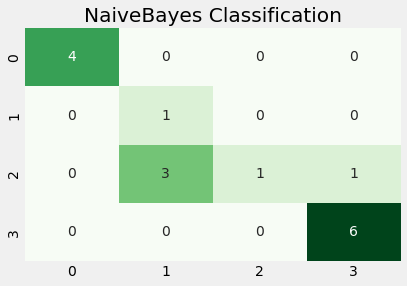

In [51]:
plt.subplot
plt.title("NaiveBayes Classification")
sns.heatmap(mb_cm, cbar=False, annot=True, cmap="Greens", fmt="d")

# SUPPORT VECTOR MACHINE

In [52]:
svm_classifier = (SVC(kernel='linear'))
svm_classifier.fit(x_train,y_train)

#Predicting On Train Data
pred_train_svm = svm_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_svm = np.mean(pred_train_svm==y_train)
print("ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE:",train_acc_svm )

#Prediciting On Test Data
pred_test_svm = svm_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_svm = np.mean(pred_test_svm==y_test)
print("ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE:",test_acc_svm)

#Confusion Matrix
svm_cm = confusion_matrix(y_test,pred_test_svm)

#Classification Report
print("CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:\n", classification_report(y_test,pred_test_svm))

ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE: 1.0
ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE: 1.0
CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [53]:
accuracy_svm = round(accuracy_score(y_test,pred_test_svm),4)
precision_svm = round(precision_score(y_test,pred_test_svm,average = 'macro'),4)
recall_svm = round(recall_score(y_test,pred_test_svm,average = 'macro'),4)
f1_svm = round(f1_score(y_test,pred_test_svm,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_svm )
print('Precision Score  : ',precision_svm )
print('Recall Score     : ', recall_svm)
print('f1-Score         : ',f1_svm )

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0


<AxesSubplot:title={'center':'SVM Classification'}>

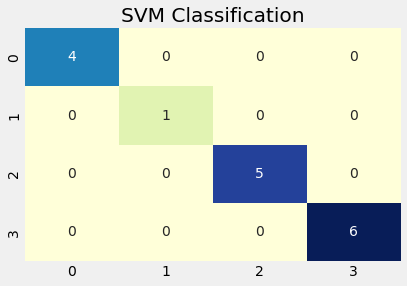

In [54]:
plt.subplot
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

# KNN CLASSIFICATION

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_train_predict=knn.predict(x_train)

knn_prediction = knn.predict(x_test)
knn_score = knn.score(x_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(x_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(x_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)
print('Classification Report:Train data\n')
print(classification_report(y_train, knn_train_predict))

KNN Classification Train Accuracy: 98.41%
KNN Classification Test Accuracy: 100.0%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         9
           3       0.94      1.00      0.97        15

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.99      0.98      0.98        63



In [57]:
accuracy_knn = round(accuracy_score(y_test,knn_prediction),4)
precision_knn = round(precision_score(y_test,knn_prediction,average = 'macro'),4)
recall_knn = round(recall_score(y_test,knn_prediction,average = 'macro'),4)
f1_knn = round(f1_score(y_test,knn_prediction,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_knn)
print('Precision Score  : ',precision_knn)
print('Recall Score     : ', recall_knn)
print('f1-Score         : ',f1_knn)

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0


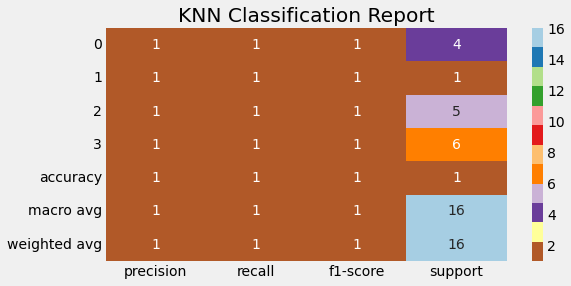

In [89]:
clf_report5 = classification_report(y_test, knn_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report5).T, annot=True,cmap="Paired_r")
plt.title("KNN Classification Report")
plt.show()

<AxesSubplot:title={'center':'KNN Classification'}>

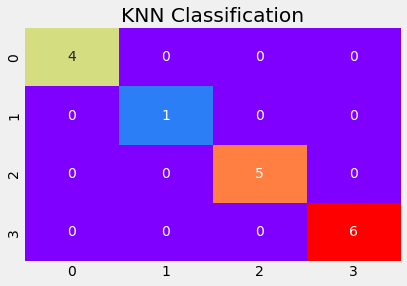

In [58]:
plt.subplot
plt.title("KNN Classification")
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

In [59]:
table = {'Classifier' : ['DECISION TREE', 'RANDOM FOREST', 'MULTINOMIAL NAIVE BAYES', 'SUPPORT VECTOR MACHINE','KNN CLASSIFIER'], 'Accuracy_Score' : [accuracy_dt, accuracy_rf, accuracy_mb, accuracy_svm, accuracy_knn], 'Precision_Score' : [precision_dt, precision_rf, precision_mb, precision_svm, precision_knn], 'Recall_Score' : [recall_dt, recall_rf, recall_mb, recall_svm, recall_knn], 'F1-Score' : [f1_dt, f1_rf, f1_mb, f1_svm, f1_knn]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy_Score,Precision_Score,Recall_Score,F1-Score
0,DECISION TREE,0.6875,0.5417,0.75,0.5714
1,RANDOM FOREST,0.9375,0.8750,0.95,0.8889
2,MULTINOMIAL NAIVE BAYES,0.7500,0.7768,0.80,0.6641
3,SUPPORT VECTOR MACHINE,1.0000,1.0000,1.00,1.0000
4,KNN CLASSIFIER,1.0000,1.0000,1.00,1.0000


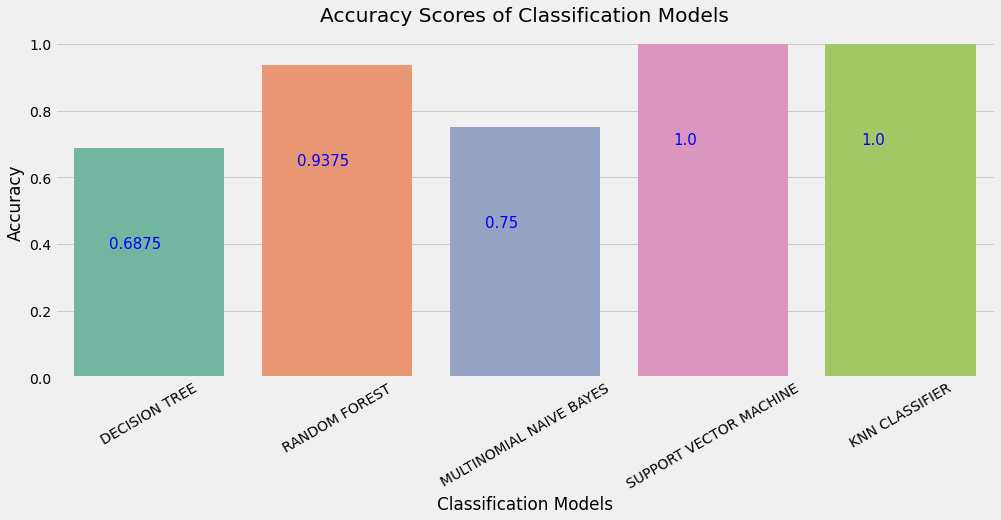

In [60]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy_Score, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

# Finalizing Model

We Finalize knn Model as it gives 100% accuracy

Deployment Process

In [61]:
import pickle
from pickle import dump
from pickle import load

In [62]:
dump(knn ,open('knn_model.pkl','wb'))

In [63]:
loaded_model = load(open('knn_model.pkl','rb'))